<a href="https://colab.research.google.com/github/Danielewicz-code/Titanic_deaths/blob/main/Titanic_muertes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder

In [ ]:
#traemos la informacion del dataset y vemos sus dimensiones
titanic_datos= pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')

print(titanic_datos.shape)

(891, 12)


Aquí podemos ver que tenemos muchos datos diferentes, primero, hay datos que faltan y hay que nivelar o modificar de alguna manera, en este caso creo que voy a optar por minimizar todos los datos hasta el nivel de 'AGE' o la edad. Segundo, veo que hay varios datos que se tienen que convertir a un patron binario, en cuando a la cabina, nombre y tiket, para mi lo considero valores relevantes para el modelo pero debido a la escases de parametros que tiene uno y la dificultad para convertirlo a binario lo que hare sera eliminarlos totalmente.

In [ ]:
#vemos los datos originales
titanic_datos.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#informacion original del dataset
titanic_datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
#descripción de caracteristicas
titanic_datos.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Graficas de datos


array([[<Axes: title={'center': 'PassengerId'}>,
        <Axes: title={'center': 'Survived'}>,
        <Axes: title={'center': 'Pclass'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'SibSp'}>,
        <Axes: title={'center': 'Parch'}>],
       [<Axes: title={'center': 'Fare'}>, <Axes: >, <Axes: >]],
      dtype=object)

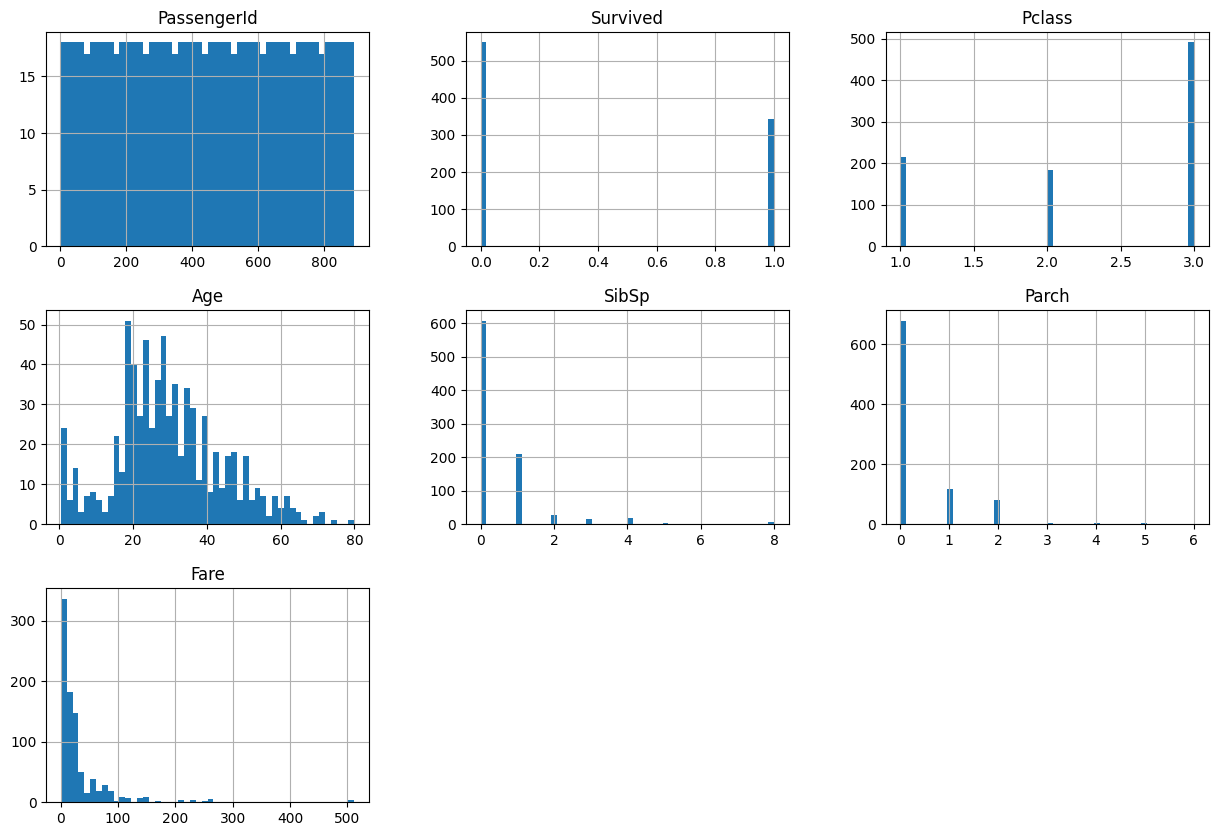

In [ ]:
#grafica
titanic_datos.hist(bins= 50, figsize= (15, 10))

Aquí pudimos ver mas que nada como se comportan los datos entre si y la relacion que tienen, por un lado graficamos los elementos numericos para ver sus dimensiones mas claras y por otro lado lo que hacemos es crear una matriz de correlación para con los datos.

<Axes: >

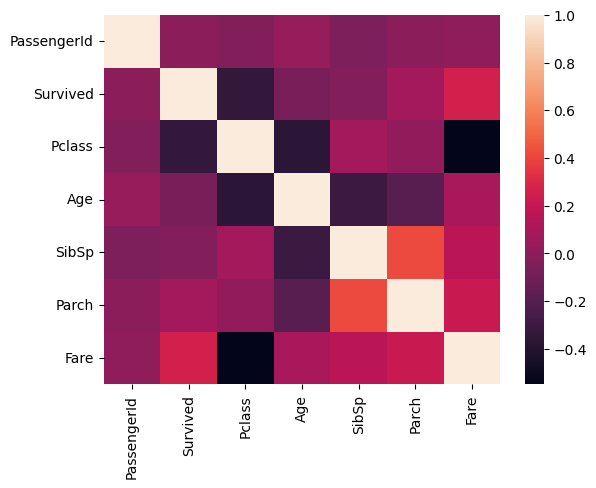

In [ ]:
#matriz de correlación
corr = titanic_datos.corr(numeric_only= True)

sns.heatmap(corr)



Ahora haremos las modificaciones antes mencionadas al dataset

In [ ]:
#nivelar todos los datos
titanic_datos = titanic_datos.dropna(subset= ['Age'])

titanic_datos.shape

(714, 12)

In [ ]:
#binarizar los valores no numericos
titanic_data= pd.get_dummies(titanic_datos, columns= ['Sex', 'Embarked'])

In [ ]:
#borrar los valores que no se usaran
titanic_clean = titanic_data.drop(['Name', 'Ticket', 'Cabin'], axis= 'columns')

titanic_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  714 non-null    int64  
 1   Survived     714 non-null    int64  
 2   Pclass       714 non-null    int64  
 3   Age          714 non-null    float64
 4   SibSp        714 non-null    int64  
 5   Parch        714 non-null    int64  
 6   Fare         714 non-null    float64
 7   Sex_female   714 non-null    uint8  
 8   Sex_male     714 non-null    uint8  
 9   Embarked_C   714 non-null    uint8  
 10  Embarked_Q   714 non-null    uint8  
 11  Embarked_S   714 non-null    uint8  
dtypes: float64(2), int64(5), uint8(5)
memory usage: 48.1 KB


Crear el modelo de regresion logistica.

Una vez que ya tenemos un dataset limpio y funcional podemos hacer el modelo.

In [ ]:
#pasamos el dataset y la etiqueta de clasificacion que queremos, en este caso la supervivencia
X= titanic_clean.drop(['Survived'], axis= 'columns')
Y= titanic_clean['Survived']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.2, random_state= 69)

model= LogisticRegression(max_iter=10000)

model.fit(X_train, Y_train)

score= model.predict(X_test)

prediction= accuracy_score(Y_test, score)

print(f'esta es la acertividad del modelo: {prediction}')



esta es la acertividad del modelo: 0.8251748251748252


Pasamos una prediccion a ver que tal se desempeña el modelo

In [ ]:
prediccion= X_test.iloc[69]

prediction = model.predict([prediccion])

mapping= {0: 'muerto', 1: 'vivo'}

pred_text = [mapping[pred] for pred in prediction]

print(f'la prediccion es: {pred_text}')

la prediccion es: ['vivo']


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Eso es todo, el modelo tiene un 82% de acertividad lo cual es bueno, se podria mejorar con mas datos de mejor calidad.